# Visualizing Sorting Algorithm Behavior

In [1]:
import numpy as np
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import time
import scipy.signal

In [2]:
def generateRandomList(n):
    # Generate list of integers
    
    # Possible alternative: l = [random.randint(0, n) for _ in range(n)]
    # does this increase/decrease randomness? not sure
    
    l = [i for i in range(n)]
    
    # Randomly shuffle integers
    random.shuffle(l)
    return l

In [3]:
def plotSmoothed(n, sorting_fn, window_len, poly_order):
    # Generate randomly shuffled list
    rand_list = generateRandomList(n)
    
    # Sort the list using the sorting function
    _, y, x = sorting_fn(rand_list)
    
    # FFT code that did not work
#     https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
#     w = scipy.fftpack.rfft(y)
#     f = scipy.fftpack.rfftfreq(n, x[1]-x[0])
#     spectrum = w**2

#     cutoff_idx = spectrum < (spectrum.max()/5)
#     w2 = w.copy()
#     w2[cutoff_idx] = 0

#     y2 = scipy.fftpack.irfft(w2)

    # Generate regular plot (unsmoothed)
    plt.figure()
    plt.plot(x,y)

    # Smooth time step array using Savitzky-Golay filter (need to read up on exactly how this works,
    # how to auto-generate appropriate parameters)
    y2 = scipy.signal.savgol_filter(y, window_len, poly_order)
    
    # Generate smoothed plot
    plt.figure()
    plt.plot(x, y2)

## Sorting algorithms
Source: https://github.com/TheAlgorithms/Python

### Insertion Sort

for $i = 0, ... N-1$: 
- designate item $i$ as the traveling item - swap item backwards until the traveling item is in the right place among previously examined items

$\Theta(N^2)$

In [26]:
def insertion_sort(collection):
    """Pure implementation of the insertion sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> insertion_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> insertion_sort([])
    []
    >>> insertion_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    time_list = [0]
    step_list = [0]
    
    for index in range(1, len(collection)):     
        t1 = time.time()
        
        while 0 < index and collection[index] < collection[index - 1]:
            
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
        
        t2 = time.time()
        time_list.append(t2 - t1)
        step_list.append(step_list[-1] + 1)

    return collection, time_list, step_list

generating random numbers
smoothing plot


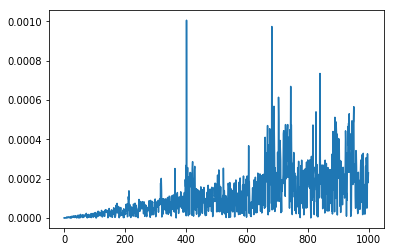

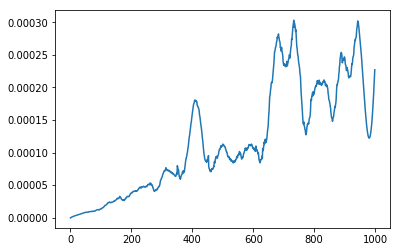

In [32]:
plotSmoothed(1000, insertion_sort, 103, 5)

In [33]:
def insertion_sort_v2(collection):
    """Pure implementation of the insertion sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> insertion_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> insertion_sort([])
    []
    >>> insertion_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    time_list = [0]
    step_list = [0]
    
    for index in range(1, len(collection)):        
        while 0 < index and collection[index] < collection[index - 1]:
            t1 = time.time()
            
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
        
            t2 = time.time()
            time_list.append(t2 - t1)
            step_list.append(step_list[-1] + 1)

    return collection, time_list, step_list

generating random numbers
smoothing plot


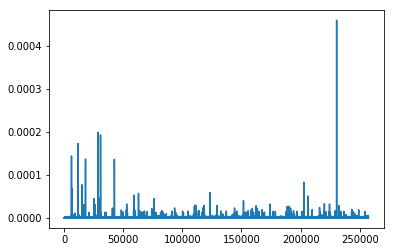

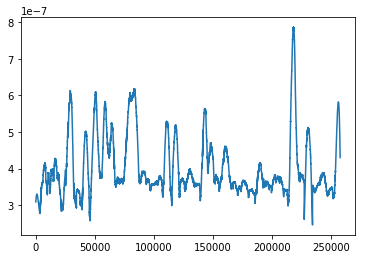

In [34]:
plotSmoothed(1000, insertion_sort_v2, 7003, 3)

### Selection Sort

repeat until all items are fixed: 
- find the smallest item 
- swap this time to the front and fix its position

$\Theta(N^2)$ worst case

In [22]:
def selection_sort(collection):
    """Pure implementation of the selection sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> selection_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> selection_sort([])
    []
    >>> selection_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    time_list = [0]
    step_list = [0]
    
    length = len(collection)
    for i in range(length):
        least = i
        
        t1 = time.time()
        
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (
            collection[i], collection[least]
        )
        
        t2 = time.time()
        time_list.append(t2 - t1)
        step_list.append(step_list[-1] + 1)
        
    return collection, time_list, step_list

generating random numbers
smoothing plot


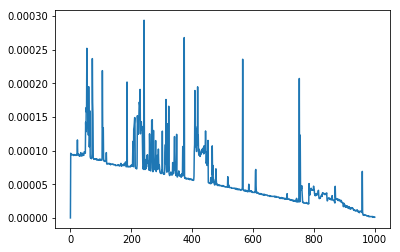

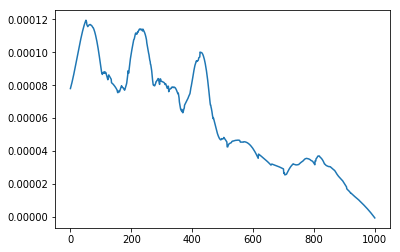

In [24]:
plotSmoothed(1000, selection_sort, 103, 3)

In [38]:
def selection_sort_v2(collection):
    """Pure implementation of the selection sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> selection_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> selection_sort([])
    []
    >>> selection_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    time_list = [0]
    step_list = [0]
    
    length = len(collection)
    for i in range(length):
        least = i
        
        
        for k in range(i + 1, length):
            
            t1 = time.time()
            
            if collection[k] < collection[least]:
                least = k
                
            
            t2 = time.time()
            time_list.append(t2 - t1)
            step_list.append(step_list[-1] + 1)
        
        collection[least], collection[i] = (collection[i], collection[least])
        
    return collection, time_list, step_list

generating random numbers
smoothing plot


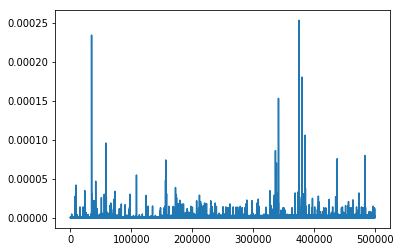

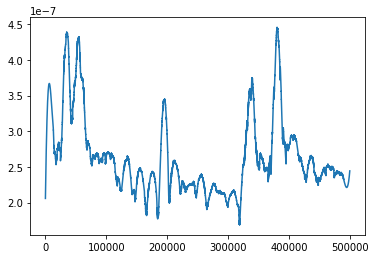

In [49]:
plotSmoothed(1000, selection_sort_v2, 20003, 3)

### Heap Sort

Build a max-heap out of the array, popping off the largest element and rebalancing the heap until it is empty. 

$\Theta(N \log N)$

In [66]:
def heapify(unsorted, index, heap_size):
    largest = index
    left_index = 2 * index + 1
    right_index = 2 * index + 2
    
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:    
        largest = left_index

    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index

    if largest != index:
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]        
        heapify(unsorted, largest, heap_size)
        
def heap_sort(unsorted):
    '''
    Pure implementation of the heap sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> heap_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> heap_sort([])
    []
    >>> heap_sort([-2, -5, -45])
    [-45, -5, -2]
    '''
    
    time_list = [0]
    step_list = [0]
    
    n = len(unsorted)
    for i in range(n // 2 - 1, -1, -1):
        t1 = time.time()
        
        heapify(unsorted, i, n)
        
        t2 = time.time()
        time_list.append(t2 - t1)
        step_list.append(step_list[-1] + 1)
    for i in range(n - 1, 0, -1):
        t1 = time.time()
        
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]        
        heapify(unsorted, 0, i)
        
        t2 = time.time()
        time_list.append(t2 - t1)
        step_list.append(step_list[-1] + 1)
        
    return unsorted, time_list, step_list

generating random numbers
smoothing plot


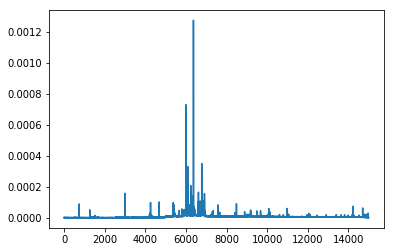

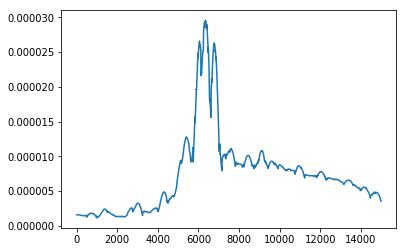

In [86]:
plotSmoothed(10000, heap_sort, 503, 3)

### Mergesort

split items into two roughly even pieces 
- mergesort each half 
- merge the two sorted halves 

$\Theta(N \log N)$

In [87]:
def merge_sort(collection):
    """Pure implementation of the merge sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> merge_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> merge_sort([])
    []
    >>> merge_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    time_list = [0]
    
    length = len(collection)
    if length > 1:
        midpoint = length // 2
        
        left_half, t_temp1 = merge_sort(collection[:midpoint])
        right_half, t_temp2 = merge_sort(collection[midpoint:])
        
        time_list += t_temp1 + t_temp2
        
        i = 0
        j = 0
        k = 0
        left_length = len(left_half)
        right_length = len(right_half)
        
        t1 = time.time()
        
        while i < left_length and j < right_length:
            if left_half[i] < right_half[j]:
                collection[k] = left_half[i]
                i += 1
            else:
                collection[k] = right_half[j]
                j += 1
            k += 1

        while i < left_length:
            collection[k] = left_half[i]
            i += 1
            k += 1

        while j < right_length:
            collection[k] = right_half[j]
            j += 1
            k += 1
            
        t2 = time.time()
        time_list.append(t2 - t1)

    return collection, time_list

In [89]:
def plotSmoothed_alt(n, sorting_fn, window_len, poly_order):
    # Generate randomly shuffled list
    rand_list = generateRandomList(n)
    
    # Sort the list using the sorting function
    _, y = sorting_fn(rand_list)
    
    # FFT code that did not work
#     https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
#     w = scipy.fftpack.rfft(y)
#     f = scipy.fftpack.rfftfreq(n, x[1]-x[0])
#     spectrum = w**2

#     cutoff_idx = spectrum < (spectrum.max()/5)
#     w2 = w.copy()
#     w2[cutoff_idx] = 0

#     y2 = scipy.fftpack.irfft(w2)

    # Generate regular plot (unsmoothed)
    plt.figure()
    plt.plot(y)

    # Smooth time step array using Savitzky-Golay filter (need to read up on exactly how this works,
    # how to auto-generate appropriate parameters)
    y2 = scipy.signal.savgol_filter(y, window_len, poly_order)
    
    # Generate smoothed plot
    plt.figure()
    plt.plot(y2)

generating random numbers


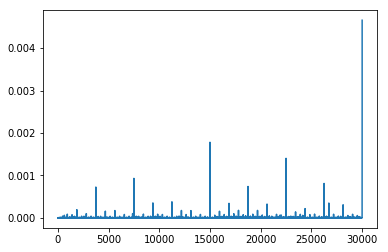

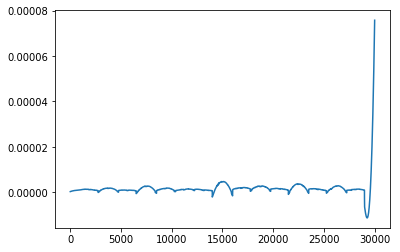

In [103]:
plotSmoothed_alt(10000, merge_sort, 2003, 3)

### Quicksort

partition the leftmost item 
- QuickSort the left half 
- QuickSort the right half
- add the two arrays

In [114]:
def quick_sort(ARRAY):
    """Pure implementation of quick sort algorithm in Python
    :param collection: some mutable ordered collection with heterogeneous
    comparable items inside
    :return: the same collection ordered by ascending
    Examples:
    >>> quick_sort([0, 5, 3, 2, 2])
    [0, 2, 2, 3, 5]
    >>> quick_sort([])
    []
    >>> quick_sort([-2, -5, -45])
    [-45, -5, -2]
    """
    
    time_list = [0]
    
    ARRAY_LENGTH = len(ARRAY)
    if( ARRAY_LENGTH <= 1):
        return ARRAY, []
    else:
        t1 = time.time()
        PIVOT = ARRAY[0]
        GREATER = [ element for element in ARRAY[1:] if element > PIVOT ]
        LESSER = [ element for element in ARRAY[1:] if element <= PIVOT ]
        
        t2 = time.time()
        time_list.append(t2 - t1)
        
        LEFT, t_temp1 = quick_sort(LESSER)
        RIGHT, t_temp2 = quick_sort(GREATER)
        
        time_list += t_temp1 + t_temp2
        sorted = RIGHT + [PIVOT] + LEFT
        
        return sorted, time_list

generating random numbers


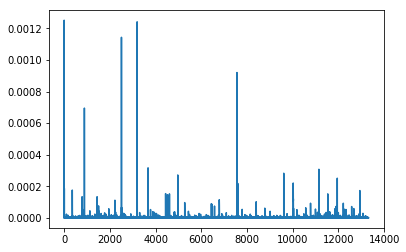

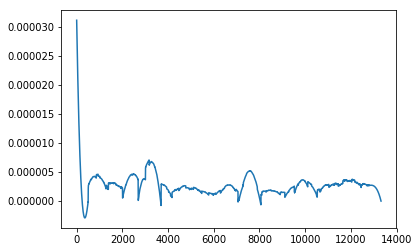

In [119]:
plotSmoothed_alt(10000, quick_sort, 1003, 3)